<a href="https://colab.research.google.com/github/Firelok45/Planners/blob/main/Planners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Формирование карты по данным лидара**


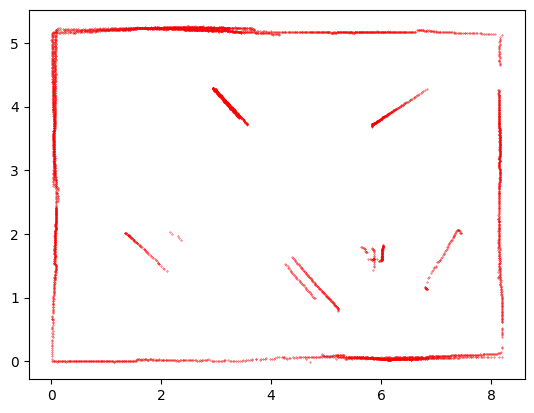

In [ ]:
data_coords_all = []
data_lens_all = []
for dirpath, _, filenames in os.walk('/content/drive/MyDrive/examples/'):
  filenames = sorted(filenames)
  filenames = filenames[2:]
  for filename in filenames:
    with open(dirpath+filename, 'r') as file:
      data_coords = []
      data_lens = []
      for line in file:
          parts = line.strip().split(";")
          parts_coords = parts[0].strip().split("\n")
          for i in parts_coords:
              coords = i.strip().split(", ")
              mas = []
              for j in coords:
                  mas.append(float(j))
              data_coords.append(mas)

          parts_len = parts[1].strip().split("\n")
          for i in parts_len:
              lengthes = i.strip().split(", ")
              mas = []
              for j in lengthes:
                  mas.append(float(j))
              data_lens.append(mas)
    data_coords_all.append(data_coords)
    data_lens_all.append(data_lens)


# Обработка данных из первого файла
coords = []
accuracy = 4 # Количество знаков после запятой
for j in range(len(data_coords_all[0])):
  x_rob = data_coords_all[0][j][0]
  y_rob = data_coords_all[0][j][1]
  alpha_rob = data_coords_all[0][j][2] - 0.18
  if (x_rob > 7.0 and x_rob < 7.05 and y_rob > 0 and y_rob < 2):
    for k in range(len(data_lens_all[0][j])):
      alpha_lidar = k * (4 * math.pi / 3) / len(data_lens_all[0][j]) - 2 * math.pi / 3
      if data_lens_all[0][j][k] != 5.6 and alpha_lidar > -1.66 and alpha_lidar < 1.83 :
          coords.append((round(data_lens_all[0][j][k] * math.cos(alpha_rob - alpha_lidar) + x_rob + 1.2, accuracy), round(data_lens_all[0][j][k] * math.sin(alpha_rob - alpha_lidar) + y_rob-1.23, accuracy)))

# Общий массив для точек со всех рассматриваемых данных
x = [[] for i in range(6)]
y = [[] for i in range(6)]

# Внесение точек с данных лидара в общий массив
for i in range (len(coords)):
  x[0].append(coords[i][0])
  y[0].append(coords[i][1])

coords = []
for j in range(len(data_coords_all[0])):
  x_rob = data_coords_all[0][j][0]
  y_rob = data_coords_all[0][j][1]
  alpha_rob = data_coords_all[0][j][2] - 0.2
  if (x_rob > 6.76 and x_rob < 6.85 and y_rob > -3.5 and y_rob < -0.75):
    for k in range(len(data_lens_all[0][j])):
      alpha_lidar = k * (4 * math.pi / 3) / len(data_lens_all[0][j]) - 2 * math.pi / 3
      if data_lens_all[0][j][k] != 5.6 and alpha_lidar > -1.66 and alpha_lidar < 1.83 :
          coords.append((round(data_lens_all[0][j][k] * math.cos(alpha_rob - alpha_lidar) + x_rob + 0.5, accuracy), round(data_lens_all[0][j][k] * math.sin(alpha_rob - alpha_lidar) + y_rob - 1.1, accuracy)))

# Внесение точек с данных лидара в общий массив
for i in range (len(coords)):
  x[1].append(coords[i][0])
  y[1].append(coords[i][1])

coords = []
for j in range(len(data_coords_all[0])):
  x_rob = data_coords_all[0][j][0]
  y_rob = data_coords_all[0][j][1]
  alpha_rob = data_coords_all[0][j][2] - 0.16
  if (x_rob > 5.48 and x_rob < 5.56 and y_rob > -0.8 and y_rob < 0):
    for k in range(len(data_lens_all[0][j])):
      alpha_lidar = k * (4 * math.pi / 3) / len(data_lens_all[0][j]) - 2 * math.pi / 3
      if data_lens_all[0][j][k] != 5.6 and alpha_lidar > -1.66 and alpha_lidar < 1.83 :
          coords.append((round(data_lens_all[0][j][k] * math.cos(alpha_rob - alpha_lidar) + x_rob + 1, accuracy), round(data_lens_all[0][j][k] * math.sin(alpha_rob - alpha_lidar) + y_rob + 0.2, accuracy)))

# Внесение точек с данных лидара в общий массив
for i in range (len(coords)):
  x[2].append(coords[i][0])
  y[2].append(coords[i][1])


# Обработка данных из второго файла
coords = []
for j in range(len(data_coords_all[1])):
  x_rob = data_coords_all[1][j][0]
  y_rob = data_coords_all[1][j][1]
  alpha_rob = data_coords_all[1][j][2] - 0.25
  if (x_rob > 3.25 and x_rob < 3.7 and y_rob > -1.75 and y_rob < -1):
    for k in range(len(data_lens_all[1][j])):
      alpha_lidar = k * (4 * math.pi / 3) / len(data_lens_all[1][j]) - 2 * math.pi / 3
      if data_lens_all[1][j][k] != 5.6 and alpha_lidar > -1.66 and alpha_lidar < 1.83 :
          coords.append((round(data_lens_all[1][j][k] * math.cos(alpha_rob - alpha_lidar) + x_rob, accuracy), round(data_lens_all[1][j][k] * math.sin(alpha_rob - alpha_lidar) + y_rob+0.9, accuracy)))

# Внесение точек с данных лидара в общий массив
for i in range (len(coords)):
  x[3].append(coords[i][0])
  y[3].append(coords[i][1])

coords = []
for j in range(len(data_coords_all[1])):
  x_rob = data_coords_all[1][j][0]
  y_rob = data_coords_all[1][j][1]
  alpha_rob = data_coords_all[1][j][2] - 0.27
  if (x_rob > 1.95 and x_rob < 1.964 and y_rob > -2.5 and y_rob < -1.5):
    for k in range(len(data_lens_all[1][j])):
      alpha_lidar = k * (4 * math.pi / 3) / len(data_lens_all[1][j]) - 2 * math.pi / 3
      if data_lens_all[1][j][k] != 5.6 and alpha_lidar > -1.66 and alpha_lidar < 1.83 :
          coords.append((round(data_lens_all[1][j][k] * math.cos(alpha_rob - alpha_lidar) + x_rob - 0.2, accuracy), round(data_lens_all[1][j][k] * math.sin(alpha_rob - alpha_lidar) + y_rob + 0.08, accuracy)))

# Внесение точек с данных лидара в общий массив
for i in range (len(coords)):
  x[4].append(coords[i][0])
  y[4].append(coords[i][1])


# Обработка данных из третьего файла
coords = []
for j in range(len(data_coords_all[2])):
  x_rob = data_coords_all[2][j][0]
  y_rob = data_coords_all[2][j][1]
  alpha_rob = data_coords_all[2][j][2] - 0.29
  if (x_rob > 6.4 and x_rob < 7.2 and y_rob < -2.4 and y_rob > -2.5):
    for k in range(len(data_lens_all[2][j])):
      alpha_lidar = k * (4 * math.pi / 3) / len(data_lens_all[2][j]) - 2 * math.pi / 3
      if data_lens_all[2][j][k] != 5.6 and alpha_lidar > -1.66 and alpha_lidar < 1.83 :
          coords.append((round(data_lens_all[2][j][k] * math.cos(alpha_rob - alpha_lidar) + x_rob + 0.46, accuracy), round(data_lens_all[2][j][k] * math.sin(alpha_rob - alpha_lidar) + y_rob - 1.1, accuracy)))

# Внесение точек с данных лидара в общий массив
for i in range (len(coords)):
  x[5].append(coords[i][0])
  y[5].append(coords[i][1])


# Обрезка карты для избавления от выбросов вне границ и выравнивание карты относительно нуля
x_all = []
y_all = []

for i in range(len(x)):
  for j in range(len(x[i])):
    if x[i][j] < 9.085 and y[i][j] > -4.5:
      x_all.append(round(x[i][j], 2) - 0.88)
      y_all.append(round(y[i][j], 2) + 4.1)

plt.scatter(x_all, y_all, s=0.1, edgecolors="r")
plt.show()

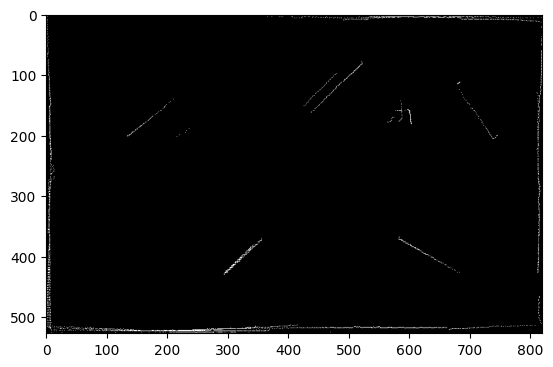

In [ ]:
# Дискретизация
original_map = np.zeros((527, 820))
for i in range(len(x_all)):
  original_map[int(y_all[i]*100)][int(x_all[i]*100)] = 1

plt.imshow(original_map, cmap='gray')
plt.show()

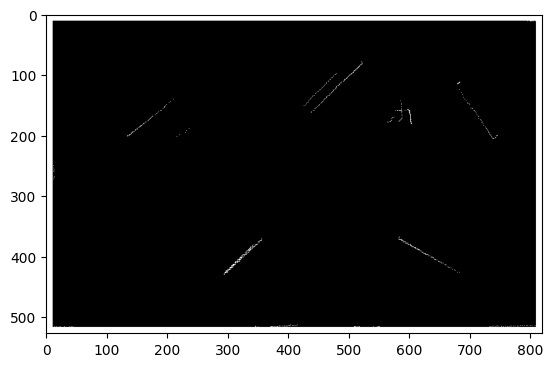

In [ ]:
# Выделение границ карты
map_with_borders = np.uint8(np.copy(original_map))

_, labels, stats, _ = cv2.connectedComponentsWithStats(map_with_borders)
x, y, width, height, area = stats[0]
cv2.rectangle(map_with_borders, (x, y), (x + width, y + height), (1), 20)

plt.imshow(map_with_borders, cmap='gray')
plt.show()

In [ ]:
def map_expansion(expansion, original_map):
   # Функция для расширения препятствий

  kernel_size = 2 * expansion + 1  # Размер ядра = 2 * 30 + 1
  kernel = np.ones((kernel_size, kernel_size), np.uint8)
  expanded_obstacles = cv2.dilate(original_map.astype(np.uint8), kernel)

  return expanded_obstacles

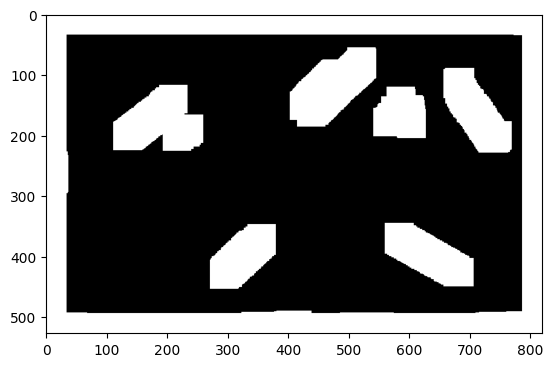

In [ ]:
# Расширение препятствий
expansion = 23

extended_map = map_expansion(expansion, np.copy(np.copy(map_with_borders)))

plt.imshow(extended_map, cmap='gray')
plt.show()

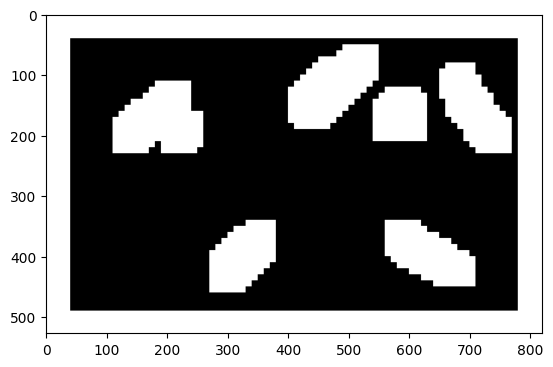

In [ ]:
# Аппроксимация квадратами 10 на 10
final_map = np.zeros((len(extended_map), len(extended_map[0])))
dimension = 10

for i in range(0, len(extended_map), dimension):
  for j in range(0, len(extended_map[i]), dimension):
    if np.any(extended_map[i:i+dimension, j:j+dimension] == 1):
      final_map[i:i+dimension, j:j+dimension] = 1
    else:
      final_map[i:i+dimension, j:j+dimension] = 0

im2 = np.copy(final_map)

plt.imshow(final_map, cmap='gray')
plt.show()

**Граф видимости**

In [ ]:
def get_line(start, end):
    # Функция, реализующая алгоритм Брезенхема для рисования наклонных отрезков

    # Начальные условия
    x_s, y_s = start
    x_e, y_e = end
    dx = x_e - x_s
    dy = y_e - y_s
    sw = False
    is_steep = False

    # Поворот линии, если наклон больше 45гр
    if math.fabs(dy) > math.fabs(dx):
      is_steep = True
      x_s, y_s = y_s, x_s
      x_e, y_e = y_e, x_e
      dx = x_e - x_s
      dy = y_e - y_s

    # Перемена местами начальной и конечной точки, если начальная правее конечной
    if x_s > x_e:
      x_s, x_e = x_e, x_s
      y_s, y_e = y_e, y_s
      dx = x_e - x_s
      dy = y_e - y_s
      sw = True

    # Вычисление ошибки
    error = int(dx / 2.0)

    if y_s < y_e:
      ystep = 1
    else:
      ystep = -1

    # Создание точек между началом и концом
    y = y_s
    points = []
    for x in range(x_s, x_e + 1):
      if x >= 0 and y >= 0 and x <= len(final_map[0])  and y <= len(final_map[0]):
        coord = (y, x) if is_steep else (x, y)
        points.append(coord)
      error -= math.fabs(dy)
      if error < 0:
        y += ystep
        error += dx

    # Переворот массива, если начальная и конечная точки были поменяны местами
    if sw:
        points.reverse()

    return points


def sravn(mas, y, x):
  # Проверка на препятствие
    if mas[y][x] == 1:
       return True
    else:
      return False


def visibility_graph(map, start, stop):
# Граф видимости

  # Нахождение углов препятствий
  new_map = np.copy(map)
  arr_corn = []
  for y in range(len(new_map) - 1):
    for x in range(len(new_map[y]) - 1):
      if new_map[y][x] == 1 and y > 25 and y < 500 and x > 50 and x < 770:
        if np.sum(new_map[y-1:y+2, x-1:x+2]) == 4 or np.sum(new_map[y-1:y+2, x-1:x+2]) == 8:
          arr_corn.append([y, x])

  arr_corn.append(start)
  arr_corn.append(stop)
  arr_corn = np.array(arr_corn)
  arr_of_lines = []

  # Нахождение линий соединения каждого угла с каждым
  mas1 = []
  for point_st in arr_corn:
    for point_end in arr_corn:
      mas1.append(get_line(point_st, point_end))
    arr_of_lines.append(mas1)
    mas1 = []

  # Поиск линий, не пересекающих препятствия
  mas_lines = []
  counter = 0
  for i in range(len(arr_of_lines)):
    for j in range(len(arr_of_lines[i])):
      for k in range(1, len(arr_of_lines[i][j])-2):
        if sravn(map, arr_of_lines[i][j][k][0], arr_of_lines[i][j][k][1]) == True:
          counter += 1
      if counter == 0:
        mas_lines.append(arr_of_lines[i][j])
      counter = 0

  # Добавление линий, не пересекающих препятствия
  for i in range(len(mas_lines)):
    for j in range(len(mas_lines[i])):
      new_map[mas_lines[i][j][0]][mas_lines[i][j][1]] = 1

  plt.imshow(new_map, cmap='gray')
  plt.show()


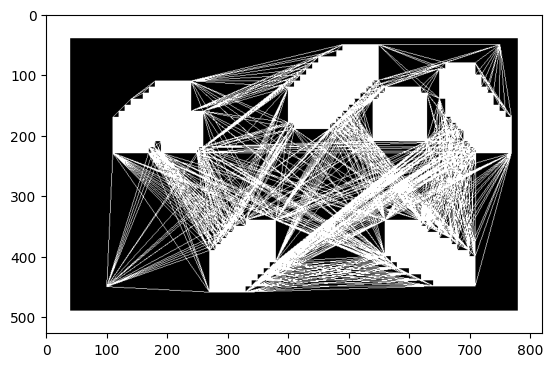

In [ ]:
visibility_graph(final_map, (450, 100), (50, 750))

**Граф Вороного**

In [ ]:
# Граф Вороного

def perpendicular(start, end):
    # Функция ищет перпендикуляр к центру отрезка между двумя точками

    x1, y1 = start
    x2, y2 = end

    dx = x2 - x1
    dy = y2 - y1

    k = dy/dx

    x_c = (max(x1, x2) - min(x1, x2))/2 + min(x1, x2)
    y_c = (max(y1, y2) - min(y1, y2))/2 + min(y1, y2)
    k_perp = -1/k
    b = y_c + x_c/k

    return [k_perp, b]


def common_point(line_1, line_2):
    # Функция ищет точку пересечения двух прямых
    k1, b1 = line_1
    k2, b2 = line_2
    x = (b2-b1)/(k1-k2)
    y = k1*x+b1

    return [x, y]

def checking_points(point_of_locus, line, point_for_check):
    # Функция проверяет, что точка point_for_check лежит в полуплоскости
    x1, y1 = point_of_locus
    x2, y2 = point_for_check

    dx = x2 - x1
    dy = y2 - y1

    k = dy/dx

    if x1<x2:
      b = y1 - x1*k
      x, y = common_point(line, [k, b])
      if (x1+1<x<x2-1): #and x != x1 and x != x2:
        return False
      else:
        return True

    else:
      b = y2 - x2*k
      x, y = common_point(line, [k, b])
      if (x2+1<x<x1-1): #and x != x1 and x != x2:
        return False
      else:
        return True

def check_point_in_line(line, point):
  # Функуия проверяет, что точка лежит в отрезке
  k, b = line
  x, y = point
  if 10 < b + k * x - y < 10:
    return True
  else:
    return False

def center_between_points(start, end):
  # Функция возвращает центр отрезка
    x1, y1 = start
    x2, y2 = end

    x_c = (max(x1, x2) - min(x1, x2))/2 + min(x1, x2)
    y_c = (max(y1, y2) - min(y1, y2))/2 + min(y1, y2)
    return [x_c, y_c]

In [ ]:
def graph_voronogo(map):
  # Граф Вороного
  # Поиск центров масс препятствий
  mas_centers = []
  arr_for_centers = np.copy(map)
  image = np.uint8(arr_for_centers)
  l1, labels, stats, l4 = cv2.connectedComponentsWithStats(image)
  for i in range(2, len(stats)):
    x, y, width, height, area = stats[i]
    mas_centers.append([int((x + x + width) / 2), int((y + y + height) / 2)])

  lines_between = []
  for k in range(len(mas_centers)):
    # Проводим перпендикуляры к линии связи между k-й и остальными верршинами
    lines_perpend = []
    for i in range(len(mas_centers)):
      if i != k:
        lines_perpend.append(perpendicular(mas_centers[k], mas_centers[i]))

    lines_perpend.append([1000000, 0])
    lines_perpend.append([1000, -len(final_map[0])*1000])
    lines_perpend.append([0, 0])
    lines_perpend.append([0.0005, len(final_map)])

    # Точки пересечений прямых
    common_points = []
    numbers_of_line = []
    for i in range(len(lines_perpend)):
      for j in range(len(lines_perpend)):
        if j > i:
          common_points.append(common_point(lines_perpend[i], lines_perpend[j]))
          numbers_of_line.append([i, j])

    # Отбрасываем точки пересечения за пределами полуплоскости
    points_for_site = []
    numbers_of_line_for_site =[]
    for i in range(len(common_points)):
      fl = 1
      for j in range(len(lines_perpend)):
        if checking_points(mas_centers[k], lines_perpend[j], common_points[i]) == False:
          fl = 0
          break
      if fl:
        points_for_site.append(common_points[i])
        numbers_of_line_for_site.append(numbers_of_line[i])

    # Проводим линии связи между точками
    lines_at_point = [0] * len(points_for_site)
    for i in range(len(points_for_site)):
      for j in range(len(points_for_site)):
        if j>i:
          if numbers_of_line_for_site[i][0] == numbers_of_line_for_site[j][0] or numbers_of_line_for_site[i][0] == numbers_of_line_for_site[j][1] or numbers_of_line_for_site[i][1] == numbers_of_line_for_site[j][0] or numbers_of_line_for_site[i][1] == numbers_of_line_for_site[j][1]:
            lines_between.append(get_line([int(points_for_site[i][0]), int(points_for_site[i][1])], [int(points_for_site[j][0]), int(points_for_site[j][1])]))
            lines_at_point[i] += 1
            lines_at_point[j] += 1

  new_map = np.zeros((len(map)+1, len(map[0])+1))

  for i in range(len(lines_between)):
    for j in range(len(lines_between[i])):
      if lines_between[i][j][0] <= len(final_map[0]) and lines_between[i][j][1] <= len(final_map):
        new_map[lines_between[i][j][1]][lines_between[i][j][0]] = 255

  for i in range(len(mas_centers)):
    new_map[mas_centers[i][1]][mas_centers[i][0]] = 255

  blur = scipy.ndimage.filters.gaussian_filter(new_map, sigma=2)

  for i in range(len(blur)):
    for j in range(len(blur[i])):
      if blur[i][j] > 0.01:
        blur[i][j] = 1
      else:
        blur[i][j] = 0

  plt.imshow(blur, cmap='gray')
  plt.show()


<ipython-input-11-9940dc982ff7>:67: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blur = scipy.ndimage.filters.gaussian_filter(new_map, sigma=2)


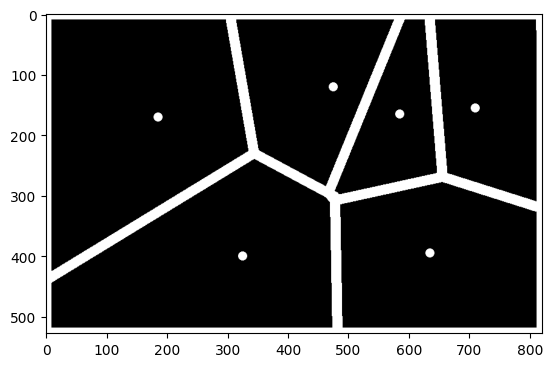

In [ ]:
graph_voronogo(final_map)

**Жук**

In [ ]:
# Алгоритм BUG

def is_obstacle(point, obstacle_map):
    x, y = point
    if obstacle_map[y][x] == 1.0:
      return True
    else:
      return False

def left(start, trajectory, obstacle_map, line, orig_start):
    end = 0
    end_point = 0
    point = 0
    j = 0
    swap = [0]*4
    check1 = (start[0], start[1]-1)
    while is_obstacle(check1, obstacle_map):
        j += 1
        check1 = (start[0]-j, start[1]-1)
        point = (start[0]-j, start[1])
        trajectory.append(point)
        if point in tuple(line) and line.index(point) > line.index(orig_start):
            end_point = point
            end = 1
            break
        if is_obstacle((point[0]-1, point[1]), obstacle_map):
            swap = [0,0,0,1]
            new_start = point
            return(new_start, trajectory, end, swap, end_point)
    swap = [0,0,1,0]
    new_start = check1
    return(new_start, trajectory, end, swap, end_point)

def up(start, trajectory, obstacle_map, line, orig_start):
    end = 0
    end_point = 0
    point = 0
    j = 0
    swap = [0]*4
    check3 = (start[0]+1, start[1])
    while is_obstacle(check3, obstacle_map):
        j += 1
        check3 = (start[0]+1, start[1]-j)
        point = (start[0], start[1]-j)
        trajectory.append(point)
        if point in tuple(line) and line.index(point) > line.index(orig_start):
            end_point = point
            end = 1
            break
        if is_obstacle((point[0], point[1]-1), obstacle_map):
            swap = [1,0,0,0]
            new_start = point
            return(new_start, trajectory, end, swap, end_point)
    swap = [0,1,0,0]
    new_start = check3
    return(new_start, trajectory, end, swap, end_point)

def down(start, trajectory, obstacle_map, line, orig_start):
    end = 0
    end_point = 0
    point = 0
    j = 0
    swap = [0]*4
    check2 = (start[0]-1, start[1])
    while is_obstacle(check2, obstacle_map):
        j += 1
        check2 = (start[0]-1, start[1]+j)
        point = (start[0], start[1]+j)
        trajectory.append(point)
        if point in tuple(line) and line.index(point) > line.index(orig_start):
            end_point = point
            end = 1
            break
        if is_obstacle((point[0], point[1]+1), obstacle_map):
            swap = [0,1,0,0]
            new_start = point
            return(new_start, trajectory, end, swap, end_point)
    swap = [1,0,0,0]
    new_start = check2
    return(new_start, trajectory, end, swap, end_point)

def right(start, trajectory, obstacle_map, line, orig_start):
    end = 0
    end_point = 0
    point = 0
    j = 0
    swap = [0]*4
    check4 = (start[0], start[1]+1)
    while is_obstacle(check4, obstacle_map):
        j += 1
        check4 = (start[0]+j, start[1]+1)
        point = (start[0]+j, start[1])
        trajectory.append(point)
        if point in tuple(line) and line.index(point) > line.index(orig_start):
            end_point = point
            end = 1
            break
        if is_obstacle((point[0]+1, point[1]), obstacle_map):
            swap = [0,0,1,0]
            new_start = point
            return(new_start, trajectory, end, swap, end_point)
    swap = [0,0,0,1]
    new_start = check4
    return(new_start, trajectory, end, swap, end_point)

def bug2(Start, goal, obstacle_map):
    trajectory = [(Start[1], Start[0])]
    # Создаем прямую траекторию между начальной и конечной точками
    line = get_line((Start[1], Start[0]), (goal[1], goal[0]))
    end = 0
    end_point = 0
    swap = [0]*4
    # Проходим по каждой точке на прямой траектории
    for i in range (len(line)):
        if end_point != 0 and i < line.index(end_point):
          continue
        trajectory.append(line[i])
        # Проверяем, является ли точка препятствием
        if is_obstacle((line[i][0], line[i][1]), obstacle_map):
            orig_start = line[i-1]
            start = line[i-1]
            trajectory.pop()
            if is_obstacle((start[0], start[1]-1), obstacle_map):
              swap = [1,0,0,0]
            elif is_obstacle((start[0], start[1]+1), obstacle_map):
              swap = [0,1,0,0]
            elif is_obstacle((start[0]+1, start[1]), obstacle_map):
              swap = [0,0,1,0]
            elif is_obstacle((start[0]-1, start[1]), obstacle_map):
              swap = [0,0,0,1]
            while not end:
              plt.imshow(obstacle_map, cmap='gray')
              X_values = [Point[0] for Point in trajectory]
              Y_values = [Point[1] for Point in trajectory]
              if swap[0]:
                  start, trajectory, end, swap, end_point = left(start, trajectory, obstacle_map, line, orig_start)
                  if end:
                    end = 0
                    end_iter = i
                    break

              if swap[1]:
                  start, trajectory, end, swap, end_point = right(start, trajectory, obstacle_map, line, orig_start)
                  if end:
                    end = 0
                    end_iter = i
                    break

              if swap[2]:
                  start, trajectory, end, swap, end_point = up(start, trajectory, obstacle_map, line, orig_start)
                  if end:
                    end = 0
                    end_iter = i
                    break

              if swap[3]:
                  start, trajectory, end, swap, end_point = down(start, trajectory, obstacle_map, line, orig_start)
                  if end:
                    end = 0
                    end_iter = i
                    break

    return trajectory, line

def bug(map, start, goal):
  # Жук
  # Инициализация
  obstacle_map = np.copy(map)

  # start = (100, 750) # (y, x)
  # goal =  (200, 400) # (y, x)

  if obstacle_map[start[0]][start[1]] == 1 or obstacle_map[goal[0]][goal[1]] == 1:
    print("ERROR")
  else:
    trajectory = []
    trajectory, line = bug2(start, goal, obstacle_map)

    # Отображаем карту с препятствиями
    plt.imshow(obstacle_map, cmap='gray')

    # Отображаем траекторию поверх карты
    X_values = [Point[0] for Point in trajectory]
    Y_values = [Point[1] for Point in trajectory]
    plt.plot(X_values, Y_values, "red")

    # Отображаем стартовую и целевую позиции
    plt.plot(start[1], start[0], 'bo')  # Стартовая позиция
    plt.plot(goal[1], goal[0], 'go')    # Целевая позиция

    x_values = [Point[0] for Point in line]
    y_values = [Point[1] for Point in line]
    plt.plot(x_values, y_values, "orange", alpha=0.25)
    plt.show()

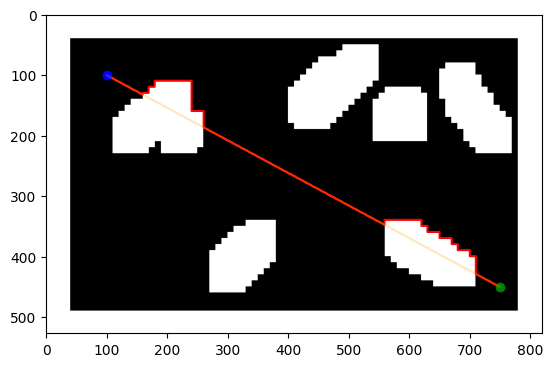

In [ ]:
bug(final_map, [100, 100], [450, 750])

**Дейкстра**

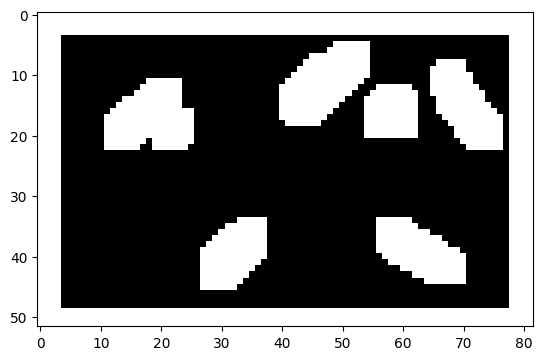

In [ ]:
# Алгоритм Дейкстры

# Уменьшение дискретизации всей карты
new_final_map = np.zeros((52, 82))

for i in range(0, len(final_map)-9, 10):
  for j in range(0, len(final_map[i])-9, 10):
    if np.any(final_map[i:i+10, j:j+10] == 1):
      new_final_map[int(i/10)][int(j/10)] = 1
    else:
      new_final_map[int(i/10)][int(j/10)] = 0

plt.imshow(new_final_map, cmap='gray')
plt.show()

In [ ]:
def table_of_map(map):
  # Граф карты в виде таблицы
  weights = np.ones((len(map)*len(map[0]), (len(map)*len(map[0])))) * np.inf

  width = len(map[0])
  length = len(map)

  for i in range(len(map)):
    for j in range(len(map[i])):

      if map[i][j] != 1:

        weights[width * i + j][width * i + j] = 0

        if j != width - 1:
          if map[i][j+1] == 0: # правая точка
            weights[width * i + j][width * i + j + 1] = 1
          else:
            weights[width * i + j][width * i + j + 1] = np.inf

        if j != 0:
          if map[i][j-1] == 0: # левая точка
            weights[width * i + j][width * i + j - 1] = 1
          else:
            weights[width * i + j][width * i + j - 1] = np.inf

        if i != 0:
          if map[i-1][j] == 0: # верхняя точка
            weights[width * i + j][width * (i - 1) + j] = 1
          else:
            weights[width * i + j][width * (i - 1) + j] = np.inf

        if i != length -1:
          if map[i+1][j] == 0: # нижняя точка
            weights[width * i + j][width * (i + 1) + j] = 1
          else:
            weights[width * i + j][width * (i + 1) + j] = np.inf

        if i != length -1 and j != width - 1:
          if map[i+1][j+1] == 0: # правая нижняя точка
            weights[width * i + j][width * (i + 1) + j + 1] = 1.41
          else:
            weights[width * i + j][width * (i + 1) + j + 1] = np.inf

        if i != 0 and j != width - 1:
          if map[i-1][j+1] == 0: # правая верхняя точка
            weights[width * i + j][width * (i - 1) + j + 1] = 1.41
          else:
            weights[width * i + j][width * (i - 1) + j + 1] = np.inf

        if i != length -1 and j != 0:
          if map[i+1][j-1] == 0: # левая нижняя точка
            weights[width * i + j][width * (i + 1) + j - 1] = 1.41
          else:
            weights[width * i + j][width * (i + 1) + j - 1] = np.inf

        if i != 0 and j != 0:
          if map[i-1][j-1] == 0: # левая верхняя точка
            weights[width * i + j][width * (i - 1) + j - 1] = 1.41
          else:
            weights[width * i + j][width * (i - 1) + j - 1] = np.inf

  return weights


def iteration_of_dijkstra(index, last_line, table):
  # Итерация Дейкстры
  new_line = np.copy(last_line)
  new_line[index] = 0
  last_step = last_line[index]

  for i in range(len(new_line)):
    if table[index, i] + last_step < new_line[i]:
      new_line[i] = table[index, i] + last_step

  return new_line


def find_new_index(last_line):
  # Найти следующую вершину
  line = np.copy(last_line)
  line = np.sort(line)
  for x in line:
    if x != 0:
      return np.where (last_line == x)[0][0]
  return False


def dijkstra(table, start):
  # Заполнение таблицы (Дейкстры)
  line = np.ones(len(table)) * np.inf
  index = start
  line[start] = 0

  table_dijkstra = np.zeros([len(table)-1, len(table)])

  for i in range(len(line)-1):
    new_line = iteration_of_dijkstra(index, line, table)
    table_dijkstra[i] = new_line
    index = find_new_index(new_line)
    line = new_line

  return table_dijkstra


def find_new_ceng_from_zero(line, last_line):
  # Найти индекс для текущего шага
  index_0 = np.where(line == 0)
  for x in index_0[0]:
    if last_line[x] - line[x]:
      return x

def find_way(table, start, end):
  # Восстановление пути
  index = end
  for i in range(len(table)):
    j = len(table) - i - 1
    if table[j][index] != 0:
      break

  way = [end]
  length = table[j][index]

  for i in range(j+1):
    k = j - i
    if table[k][index] != length:
      index = find_new_ceng_from_zero(table[k+1], table[k])
      length = table[k-1][index]
      way.append(index)
  way.append(start)
  return way


def dijkstra_final(map, start_coord, end_coord):
  table_1 = table_of_map(map)
  start_x, start_y = start_coord
  end_x, end_y = end_coord
  start = start_x + start_y*len(map[0])
  end = end_x + end_y*len(map[0])

  table_2 = dijkstra(table_1, start)
  way = find_way(table_2, start, end)

  new_map = np.copy(map)

  for z in way:
    x = z%len(map[0])
    y = z//len(map[0])
    new_map[y, x] = 2
  print(new_map)
  plt.imshow(new_map, cmap='gray')
  plt.show()


In [ ]:
print(table_of_map(new_final_map))


[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]


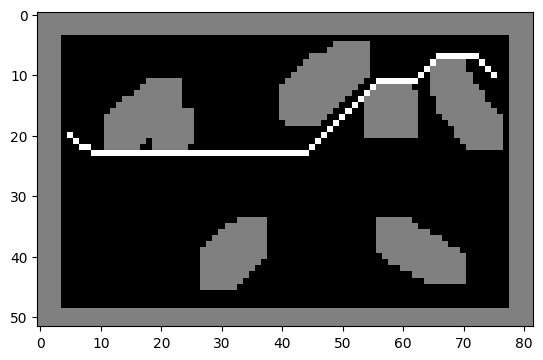

In [ ]:
dijkstra_final(new_final_map, [5, 20], [75, 10])


 **A***

In [ ]:
def evristick(map, start, end, evr):
  # Эвристическая оценка для точки

  x_s = start%len(map[0])
  y_s = start//len(map[0])

  # x_s, y_s = start
  x_e, y_e = end

  if evr == 0: # Манхетонская
    return (math.fabs(x_e-x_s) + math.fabs(y_e-y_s))
  if evr == 1: # Чебышева
    return max(math.fabs(x_e-x_s), math.fabs(y_e-y_s))
  else:
    return math.sqrt((x_e-x_s)**2 + (y_e-y_s)**2)

def evristick_line(map, line, end, evr):
  # Эвристическая оценка для строки
  new_line = np.zeros(len(line))
  line_0 = np.copy(line)
  for i in range(len(line)):
    line_0[i] = evristick(map, i, end, evr)

  return line_0


def table_of_map(map, evr):
  # Граф карты в виде таблицы
  weights = np.ones((len(map)*len(map[0]), (len(map)*len(map[0])))) * np.inf

  width = len(map[0])
  length = len(map)

  for i in range(len(map)):
    for j in range(len(map[i])):

      if map[i][j] != 1:

        weights[width * i + j][width * i + j] = 0

        if j != width - 1:
          if map[i][j+1] == 0: # правая точка
            weights[width * i + j][width * i + j + 1] = 1
          else:
            weights[width * i + j][width * i + j + 1] = np.inf

        if j != 0:
          if map[i][j-1] == 0: # левая точка
            weights[width * i + j][width * i + j - 1] = 1
          else:
            weights[width * i + j][width * i + j - 1] = np.inf

        if i != 0:
          if map[i-1][j] == 0: # верхняя точка
            weights[width * i + j][width * (i - 1) + j] = 1
          else:
            weights[width * i + j][width * (i - 1) + j] = np.inf

        if i != length -1:
          if map[i+1][j] == 0: # нижняя точка
            weights[width * i + j][width * (i + 1) + j] = 1
          else:
            weights[width * i + j][width * (i + 1) + j] = np.inf

        if evr == 1:

          if i != length -1 and j != width - 1:
            if map[i+1][j+1] == 0: # правая нижняя точка
              weights[width * i + j][width * (i + 1) + j + 1] = 1
            else:
              weights[width * i + j][width * (i + 1) + j + 1] = np.inf

          if i != 0 and j != width - 1:
            if map[i-1][j+1] == 0: # правая верхняя точка
              weights[width * i + j][width * (i - 1) + j + 1] = 1
            else:
              weights[width * i + j][width * (i - 1) + j + 1] = np.inf

          if i != length -1 and j != 0:
            if map[i+1][j-1] == 0: # левая нижняя точка
              weights[width * i + j][width * (i + 1) + j - 1] = 1
            else:
              weights[width * i + j][width * (i + 1) + j - 1] = np.inf

          if i != 0 and j != 0:
            if map[i-1][j-1] == 0: # левая верхняя точка
              weights[width * i + j][width * (i - 1) + j - 1] = 1
            else:
              weights[width * i + j][width * (i - 1) + j - 1] = np.inf

        if evr == 2:

          if i != length -1 and j != width - 1:
            if map[i+1][j+1] == 0: # правая нижняя точка
              weights[width * i + j][width * (i + 1) + j + 1] = 1.41
            else:
              weights[width * i + j][width * (i + 1) + j + 1] = np.inf

          if i != 0 and j != width - 1:
            if map[i-1][j+1] == 0: # правая верхняя точка
              weights[width * i + j][width * (i - 1) + j + 1] = 1.41
            else:
              weights[width * i + j][width * (i - 1) + j + 1] = np.inf

          if i != length -1 and j != 0:
            if map[i+1][j-1] == 0: # левая нижняя точка
              weights[width * i + j][width * (i + 1) + j - 1] = 1.41
            else:
              weights[width * i + j][width * (i + 1) + j - 1] = np.inf

          if i != 0 and j != 0:
            if map[i-1][j-1] == 0: # левая верхняя точка
              weights[width * i + j][width * (i - 1) + j - 1] = 1.41
            else:
              weights[width * i + j][width * (i - 1) + j - 1] = np.inf

  return weights


def find_new_index(map, last_line, end, evr, heuristic_evaluation):
  # Найти следующую вершину
  line = np.copy(last_line)
  line[line == 0] = np.inf
  line_with_evr = line + heuristic_evaluation
  # line_0 = np.copy(line_with_evr)
  line_0 = np.sort(line_with_evr)
  for x in line_0:
    # for i in range(len(np.where(line_with_evr == x)[0])):
    index = np.where(line_with_evr == x)[0][0]
      # if line[index] != 0:
    return index


def A_star(map, table, start, end, evr):
  # Заполнение таблицы (Дейкстры)
  heuristic_evaluation = evristick_line(map, table[0], end, evr);
  line = np.ones(len(table)) * np.inf
  index = start
  line[start] = 0

  table_dijkstra = np.zeros([len(table)-1, len(table)])

  for i in range(len(line)-1):
    new_line = iteration_of_dijkstra(index, line, table)
    table_dijkstra[i] = new_line
    if index == end[0] * len(map[0]) + end[1]:
      break
    index = find_new_index(map, new_line, end, evr, heuristic_evaluation)
    line = new_line
  return table_dijkstra


def find_new_ceng_from_zero(line, last_line):
  # Найти индекс для текущего шага
  index_0 = np.where(line == 0)
  for x in index_0[0]:
    if last_line[x] - line[x]:
      return x


def find_way(table, start, end):
  # Восстановление пути
  index = end
  for i in range(len(table)):
    j = len(table) - i - 1
    if table[j][index] != 0:
      break

  way = [end]
  length = table[j][index]

  for i in range(j+1):
    k = j - i
    if table[k][index] != length:
      index = find_new_ceng_from_zero(table[k+1], table[k])
      length = table[k][index]
      way.append(index)
  way.append(start)
  return way


def A_star_final(map, start_coord, end_coord, evr):
  table_1 = table_of_map(map, evr)
  start_x, start_y = start_coord
  end_x, end_y = end_coord
  start = start_x + start_y*len(map[0])
  end = end_x + end_y*len(map[0])
  table_2 = A_star(map, table_1, start, end_coord, evr)
  way = find_way(table_2, start, end)

  new_map = np.copy(map)

  for z in way:
    x = z%len(map[0])
    y = z//len(map[0])
    new_map[y, x] = 2

  print(new_map)
  plt.imshow(new_map, cmap='gray')
  plt.show()


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


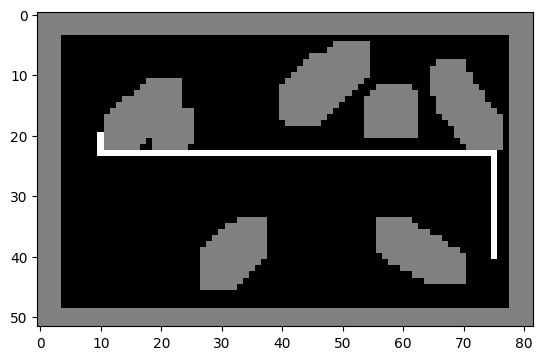

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


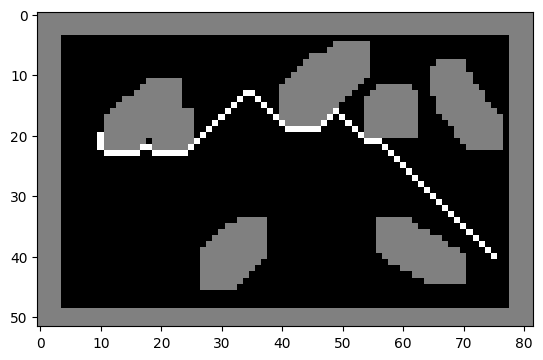

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


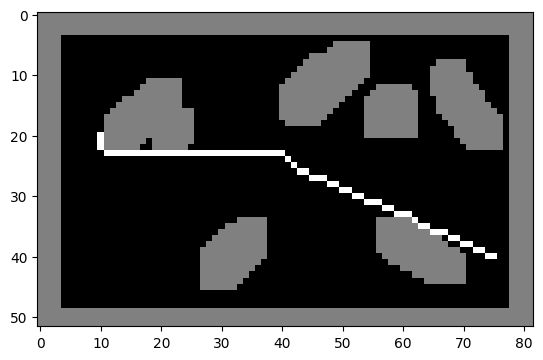

In [ ]:
A_star_final(new_final_map, [10, 20], [75, 40], 0) # Манхэттен
A_star_final(new_final_map, [10, 20], [75, 40], 1) # Чебышев
A_star_final(new_final_map, [10, 20], [75, 40], 2) # Евклид


In [ ]:
def is_obstacle(point, obstacle_map):
  # Проверка на препятствие
  y, x = point
  if obstacle_map[y][x] == 1.0:
    return True
  else:
    return False

def in_goal_area(node, goal, goal_area):
  # Проверка на попадание в целевую зону
  distance_squared = (node[0] - goal[0])**2 + (node[1] - goal[1])**2
  return distance_squared <= goal_area**2


def random_point(map):
  # Генерация рандомной точки
  x = np.random.randint(1, len(map[0]))
  y = np.random.randint(1, len(map))
  return (y, x)

def RRT(map, start, goal, goal_area, delta):

  map_test = np.copy(map)
  tree = []
  Nodes = [start]

  while True:
    new_node = random_point(map)
    # Проверка сгенерированной точки на препятствие
    if is_obstacle(new_node, map):
      continue
    # Предрасчет ближайшей точки на дереве к сгенерированной (для определения переменных и чтобы было с чем сравнивать)
    min = math.sqrt((Nodes[0][0] - new_node[0])**2 + (Nodes[0][1] - new_node[1])**2)
    min_coords = (Nodes[0][0], Nodes[0][1])
    # Поиск ближайшей точки на дереве
    for node in Nodes:
      if min > math.sqrt((node[0] - new_node[0])**2 + (node[1] - new_node[1])**2):
        min = math.sqrt((node[0] - new_node[0])**2 + (node[1] - new_node[1])**2)
        min_coords = (node[0], node[1])
    # Построение линии от ближайшей точки на дереве до сгенерированной
    line = get_line(min_coords, new_node) # (y, x)
    # Проверка на пересечение линией препятствия
    if any(is_obstacle(point, map) for point in line):
      continue
    else:
      # Если линию провести можно
      # фактор роста
      if len(line) > delta:
        # Если длина линии больше, чем фактор роста
        new_node = line[delta]
        tree.append(line[:delta+1])
        Nodes.append(new_node)
      else:
        Nodes.append(new_node)
        tree.append(line)
    # Проверка, попадает ли сгенерированная точка в целевую область
    if in_goal_area(new_node, goal, goal_area):
      line = get_line(new_node, goal) # (y, x)
      # Проверка на пересечение линией препятствия
      if not (any(is_obstacle(point, map) for point in line)):
        tree.append(line)
        last_point = new_node
        break

    #     # Проверка, попадает ли сгенерированная точка в целевую область
    # if in_goal_area(new_node, goal, goal_area):
    #   last_point = new_node
    #   break

  # #############################
  # # Вывод каждой итерации
  #   for i in range(len(tree)):
  #     for j in range(len(tree[i])):
  #       map_test[tree[i][j][0]][tree[i][j][1]] = 1

  #   plt.plot(start[1], start[0], 'bo')
  #   plt.plot(goal[1], goal[0], 'go')

  #   plt.imshow(map_test, cmap='gray')
  #   plt.show()
  # ############################

  return tree, last_point



def RRT_main(map, start, goal, goal_area, delta):
  RRT_map = np.copy(map)
  if RRT_map[start[0]][start[1]] == 1 or RRT_map[goal[0]][goal[1]] == 1:
    print("ERROR")
  else:
    tree, last_point = RRT(map, start, goal, goal_area, delta)

  for i in range(len(tree)):
    for j in range(len(tree[i])):
      RRT_map[tree[i][j][0]][tree[i][j][1]] = 1



  plt.plot(start[1], start[0], 'bo')  # Стартовая позиция
  plt.plot(goal[1], goal[0], 'go')    # Целевая позиция
  plt.plot(last_point[1], last_point[0], 'yo')

  # Отображаем карту с препятствиями
  plt.imshow(RRT_map, cmap='gray')
  plt.show()

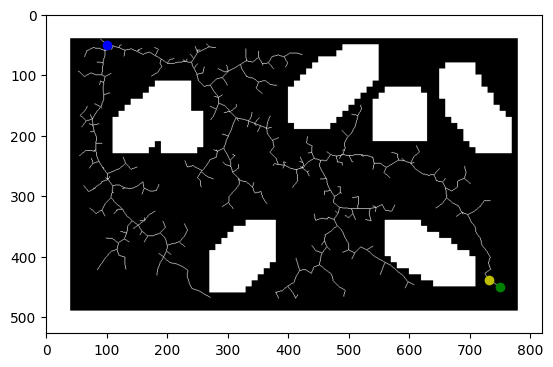

In [ ]:
RRT_main(final_map, (50, 100), (450, 750), 30, 10) #(map, start, goal, goal_area, delta)

In [ ]:
def is_obstacle(point, obstacle_map):
  # Проверка на препятствие
  y, x = point
  if obstacle_map[y][x] == 1.0:
    return True
  else:
    return False

def in_goal_area(node, nodes_2, goal_area):
  # Проверка на попадание в целевую зону
  check = False
  for i in range(len(nodes_2)):
    if (node[0] - nodes_2[i][0])**2 + (node[1] - nodes_2[i][1])**2 <= goal_area**2:
      check = True
      return check, (nodes_2[i][0], nodes_2[i][1])
  return check, ()


def random_point(map):
  # Генерация рандомной точки
  x = np.random.randint(1, len(map[0]))
  y = np.random.randint(1, len(map))
  return (y, x)

def RRT_connect(map, start, goal, goal_area, delta):

  map_test = np.copy(map)
  tree_st = []
  tree_g = []
  Nodes_st = [start]
  Nodes_g = [goal]

  while True:
    # Генерация точки со стороны старта
    new_node_st = random_point(map)
    # Проверка сгенерированной точки на препятствие
    if not is_obstacle(new_node_st, map):
      # Предрасчет ближайшей точки на дереве к сгенерированной (для определения переменных и чтобы было с чем сравнивать)
      min = math.sqrt((Nodes_st[0][0] - new_node_st[0])**2 + (Nodes_st[0][1] - new_node_st[1])**2)
      min_coords = (Nodes_st[0][0], Nodes_st[0][1])
      # Поиск ближайшей точки на дереве
      for node in Nodes_st:
        if min > math.sqrt((node[0] - new_node_st[0])**2 + (node[1] - new_node_st[1])**2):
          min = math.sqrt((node[0] - new_node_st[0])**2 + (node[1] - new_node_st[1])**2)
          min_coords = (node[0], node[1])
      # Построение линии от ближайшей точки на дереве до сгенерированной
      line_st = get_line(min_coords, new_node_st) # (y, x)
      # Проверка на пересечение линией препятствия
      if not any(is_obstacle(point, map) for point in line_st):
        # Если линию провести можно
        # фактор роста
        if len(line_st) > delta:
          # Если длина линии больше, чем фактор роста
          new_node_st = line_st[delta]
          tree_st.append(line_st[:delta+1])
          Nodes_st.append(new_node_st)
        else:
          Nodes_st.append(new_node_st)
          tree_st.append(line_st)
        # Проверка, попадает ли сгенерированная точка в целевую область
        check_area, coords_point = in_goal_area(new_node_st, Nodes_g, goal_area)
        if check_area:
          # Если точка попала в целевую область, проверяем, можно ли соединить
          line_st_end = get_line(new_node_st, coords_point)
          if not any(is_obstacle(point, map) for point in line_st_end):
            last_point_st = new_node_st
            last_point_g = coords_point
            tree_st.append(line_st_end)
            break
########################################################################################################################
    # Генерация точки со стороны цели
    new_node_g = random_point(map)
    # Проверка сгенерированной точки на препятствие
    if not is_obstacle(new_node_g, map):
      # Предрасчет ближайшей точки на дереве к сгенерированной (для определения переменных и чтобы было с чем сравнивать)
      min = math.sqrt((Nodes_g[0][0] - new_node_g[0])**2 + (Nodes_g[0][1] - new_node_g[1])**2)
      min_coords = (Nodes_g[0][0], Nodes_g[0][1])
      # Поиск ближайшей точки на дереве
      for node in Nodes_g:
        if min > math.sqrt((node[0] - new_node_g[0])**2 + (node[1] - new_node_g[1])**2):
          min = math.sqrt((node[0] - new_node_g[0])**2 + (node[1] - new_node_g[1])**2)
          min_coords = (node[0], node[1])
      # Построение линии от ближайшей точки на дереве до сгенерированной
      line_g = get_line(min_coords, new_node_g) # (y, x)
      # Проверка на пересечение линией препятствия
      if not any(is_obstacle(point, map) for point in line_g):
        # Если линию провести можно
        # фактор роста
        if len(line_g) > delta:
          # Если длина линии больше, чем фактор роста
          new_node_g = line_g[delta]
          tree_g.append(line_g[:delta+1])
          Nodes_g.append(new_node_g)
        else:
          Nodes_g.append(new_node_g)
          tree_g.append(line_g)
        # Проверка, попадает ли сгенерированная точка в целевую область
        check_area, coords_point = in_goal_area(new_node_g, Nodes_st, goal_area)
        if check_area:
          # Если точка попала в целевую область, проверяем, можно ли соединить
          line_st_end = get_line(new_node_g, coords_point)
          if not(any(is_obstacle(point, map) for point in line_st_end)):
            print("ST")
            last_point_g = new_node_g
            last_point_st = coords_point
            tree_st.append(line_st_end)
            break

  # #############################
  # # Вывод каждой итерации
  #   for i in range(len(tree_st)):
  #     for j in range(len(tree_st[i])):
  #       map_test[tree_st[i][j][0]][tree_st[i][j][1]] = 1
  #   for i in range(len(tree_g)):
  #     for j in range(len(tree_g[i])):
  #       map_test[tree_g[i][j][0]][tree_g[i][j][1]] = 1

  #   plt.plot(start[1], start[0], 'bo')
  #   plt.plot(goal[1], goal[0], 'go')

  #   plt.imshow(map_test, cmap='gray')
  #   plt.show()
  # ############################

  return tree_st, tree_g, last_point_st, last_point_g



def RRT_connect_main(map, start, goal, goal_area, delta):
  RRT_map = np.copy(map)
  if RRT_map[start[0]][start[1]] == 1 or RRT_map[goal[0]][goal[1]] == 1:
    print("ERROR")
  else:
    tree_st, tree_g, last_point_st, last_point_g = RRT_connect(map, start, goal, goal_area, delta)

  for i in range(len(tree_st)):
    for j in range(len(tree_st[i])):
      RRT_map[tree_st[i][j][0]][tree_st[i][j][1]] = 1
  for i in range(len(tree_g)):
    for j in range(len(tree_g[i])):
      RRT_map[tree_g[i][j][0]][tree_g[i][j][1]] = 1


  plt.plot(start[1], start[0], 'bo')  # Стартовая позиция
  plt.plot(goal[1], goal[0], 'go')    # Целевая позиция
  plt.plot(last_point_st[1], last_point_st[0], 'yo')
  plt.plot(last_point_g[1], last_point_g[0], 'yo')

  # Отображаем карту с препятствиями
  plt.imshow(RRT_map, cmap='gray')
  plt.show()

ST


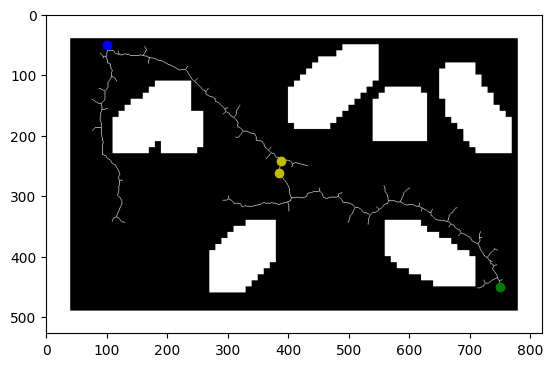

In [ ]:
RRT_connect_main(final_map, (50, 100), (450, 750), 20, 5) #(map, start, goal, goal_area, delta)

In [ ]:
def is_obstacle(point, obstacle_map):
  # Проверка на препятствие
  y, x = point
  if obstacle_map[y][x] == 1.0:
    return True
  else:
    return False

def in_goal_area(node, goal, goal_area):
  # Проверка на попадание в целевую зону
  distance_squared = (node[0] - goal[0])**2 + (node[1] - goal[1])**2
  return distance_squared <= goal_area**2


def random_point(map):
  # Генерация рандомной точки
  x = np.random.randint(1, len(map[0]))
  y = np.random.randint(1, len(map))
  return (y, x)

def rad_dynamic(initial_rad, len_Nodes, coefficient):
  return initial_rad * coefficient ** (len_Nodes)

def find_index(node, all_nodes):
  for i in range(len(all_nodes)):
    if all_nodes[i] == node:
      return i
      break

# # ??????????????????????????????????????????????????????????????????????????
def parent_points(new_node, radius, ind_nearest, all_indexes, all_nodes):
  mas_parent_points = [ind_nearest]
  if len(all_indexes)  != 0:
    while True:
      for i in range(len(all_indexes)):
        if all_indexes[i][1] == mas_parent_points[-1]:
          if in_goal_area(new_node, all_nodes[all_indexes[i][0]], radius):
            mas_parent_points.append(all_indexes[i][0])
            break
          else:
            return mas_parent_points
        elif i == len(all_indexes) - 1:
          return mas_parent_points


# # ??????????????????????????????????????????????????????????????????????????

def RRT_star(map, start, goal, goal_area, delta):
  map_test = np.copy(map)
  tree = []
  Nodes = [start]
  indexes = []
  num_child_max = 0
  trajec = []
  while True:
    new_node = random_point(map)
    # Проверка сгенерированной точки на препятствие
    if is_obstacle(new_node, map):
      continue
    # Предрасчет ближайшей точки на дереве к сгенерированной (для определения переменных и чтобы было с чем сравнивать)
    min = math.sqrt((Nodes[0][0] - new_node[0])**2 + (Nodes[0][1] - new_node[1])**2)
    min_coords = (Nodes[0][0], Nodes[0][1])
    # Поиск ближайшей точки на дереве
    for node in Nodes:
      if min > math.sqrt((node[0] - new_node[0])**2 + (node[1] - new_node[1])**2):
        min = math.sqrt((node[0] - new_node[0])**2 + (node[1] - new_node[1])**2)
        min_coords = (node[0], node[1])
    # # Построение линии от ближайшей точки на дереве до сгенерированной
    line = get_line(min_coords, new_node) # (y, x)
    # Проверка на пересечение линией препятствия
    if any(is_obstacle(point, map) for point in line):
      continue

#######################################################################################

    # Поиск всех родителей ближайшей точки
    if len(tree) != 0:
      par_points = parent_points(new_node, rad_dynamic(1500, len(Nodes), 0.999), find_index(min_coords, Nodes), indexes, Nodes)
      for i in reversed(range(len(par_points))):
        line = get_line(Nodes[par_points[i]], new_node) # (y, x)
        if not any(is_obstacle(point, map) for point in line):
          min_coords = Nodes[par_points[i]]
          break

#######################################################################################
    # Если линию провести можно
    # фактор роста
    if len(line) > delta:
      # Если длина линии больше, чем фактор роста
      new_node = line[delta]
      tree.append(line[:delta+1])
      Nodes.append(new_node)
    else:
      Nodes.append(new_node)
      tree.append(line)

#######################################################################################

    # Запись родитель-дочь

    ind_par = 0
    ind_child = 0
    q = 0
    for i in range(len(tree)):
      if len(indexes) == 0:
        ind_par = 0
        ind_child = 1
        break
      if min_coords == start:
        ind_par = 0
        q = 1
      if tree[i][-1] == min_coords and q == 0:
        ind_par = indexes[i][1]
        break
    ind_child = num_child_max + 1
    num_child_max += 1
    indexes.append((ind_par, ind_child))
########################################################################################

    if in_goal_area(new_node, goal, goal_area):
      line = get_line(new_node, goal) # (y, x)
      # Проверка на пересечение линией препятствия
      if not(any(is_obstacle(point, map) for point in line)):
        tree.append(line)
        last_point = new_node
        break

  #############################
  # Вывод каждой итерации
    # for i in range(len(tree)):
    #   for j in range(len(tree[i])):
    #     map_test[tree[i][j][0]][tree[i][j][1]] = 1

    # plt.plot(start[1], start[0], 'bo')
    # plt.plot(goal[1], goal[0], 'go')


    # plt.imshow(map_test, cmap='gray')
    # plt.show()
  ############################
  # par_points_of_last = parent_points(last_point, 800, find_index(last_point, Nodes), indexes, Nodes)
  # for i in range(len(par_points_of_last)):
  #   trajec.append(Nodes[par_points_of_last[i]])
  # return tree, last_point, trajec
  return tree, last_point


def RRT_star_main(map, start, goal, goal_area, delta):
  RRT_map = np.copy(map)
  if RRT_map[start[0]][start[1]] == 1 or RRT_map[goal[0]][goal[1]] == 1:
    print("ERROR")
  else:
    tree, last_point = RRT_star(map, start, goal, goal_area, delta)

  for i in range(len(tree)):
    for j in range(len(tree[i])):
      RRT_map[tree[i][j][0]][tree[i][j][1]] = 1


  plt.plot(start[1], start[0], 'bo')  # Стартовая позиция
  plt.plot(goal[1], goal[0], 'go')    # Целевая позиция
  plt.plot(last_point[1], last_point[0], 'yo')

  # Отображаем карту с препятствиями
  plt.imshow(RRT_map, cmap='gray')

  # # Отображаем траекторию поверх карты
  # X_values = [Point[1] for Point in trajec]
  # Y_values = [Point[0] for Point in trajec]
  # plt.plot(X_values, Y_values, "red", alpha = 0.5)
  plt.show()

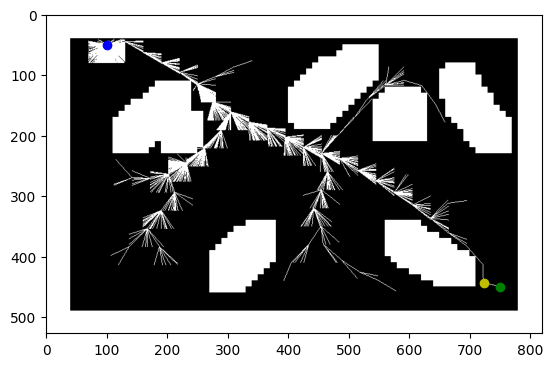

In [ ]:
RRT_star_main(final_map, (50, 100), (450, 750), 30, 30) #(map, start, goal, goal_area, delta)